<a href="https://colab.research.google.com/github/Marzkartella/Tella1/blob/main/IRIS_Dataset_Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
!pip install fpdf
from fpdf import FPDF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import joblib




In [98]:
# Load the dataset
file_path = "/content/IRIS.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  144 non-null    float64
 1   sepal_width   143 non-null    float64
 2   petal_length  142 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None,
    sepal_length  sepal_width  petal_length  petal_width      species
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           NaN          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa)

In [99]:
# Check for missing values
missing_values = df.isnull().sum()

# Fill missing values using mean imputation
df_filled = df.fillna(df.mean(numeric_only=True))

# Confirm missing values are handled
missing_values_after = df_filled.isnull().sum()

missing_values, missing_values_after


(sepal_length    6
 sepal_width     7
 petal_length    8
 petal_width     0
 species         0
 dtype: int64,
 sepal_length    0
 sepal_width     0
 petal_length    0
 petal_width     0
 species         0
 dtype: int64)

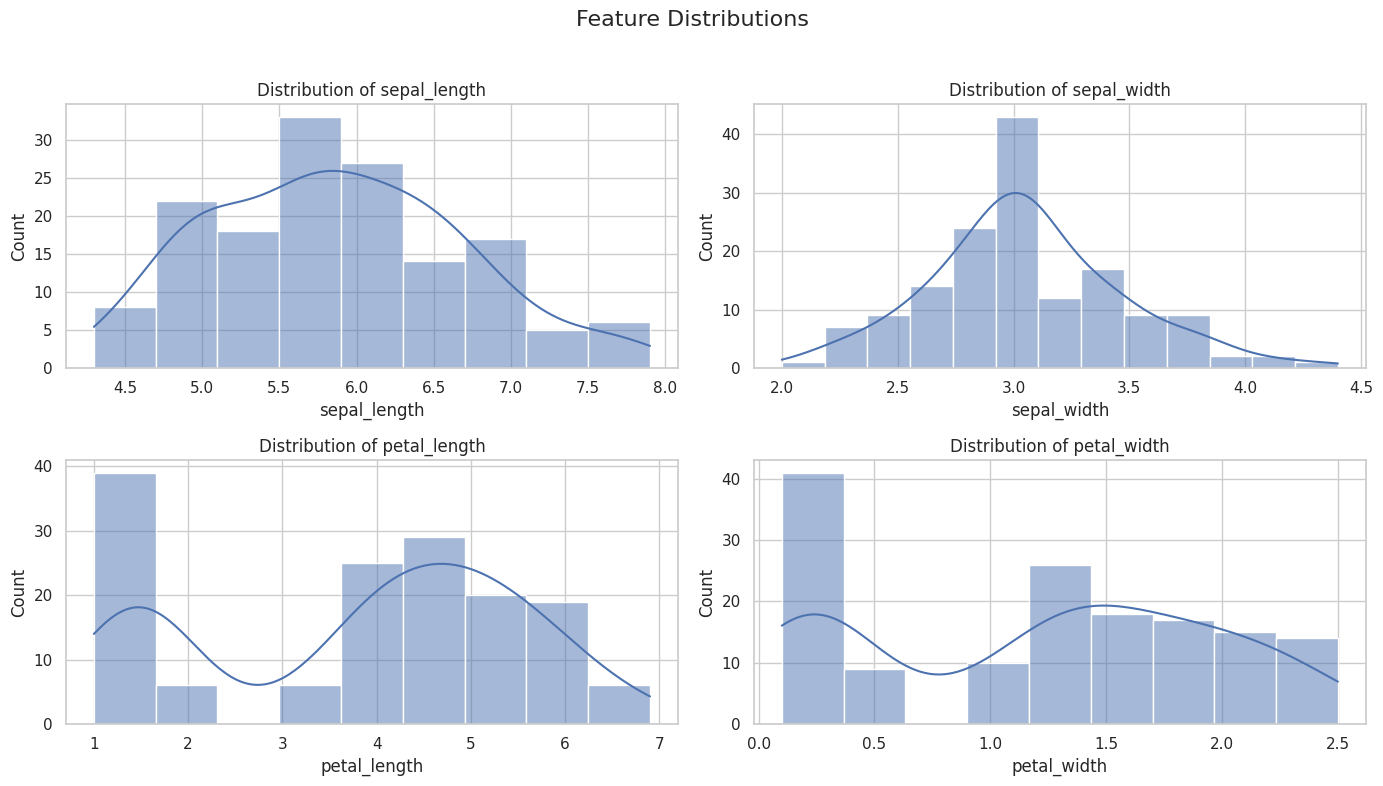

,0
sepal_length,0.284203
sepal_width,0.360113
petal_length,-0.331737
petal_width,-0.104997


In [100]:
# Set up the visual style
sns.set(style="whitegrid")

# Plot distributions of the numeric features
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Feature Distributions", fontsize=16)

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df_filled, x=feature, kde=True, ax=ax)
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Calculate skewness
skewness = df_filled[features].skew()
skewness


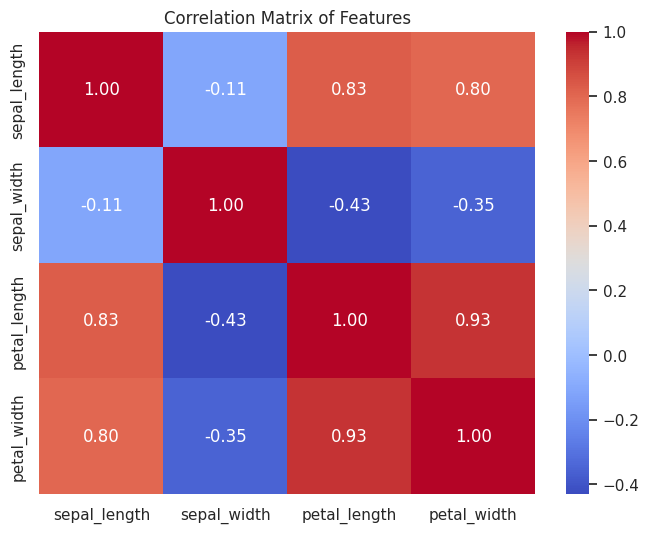

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.111647,0.827237,0.799825
sepal_width,-0.111647,1.000000,-0.428292,-0.351900
petal_length,0.827237,-0.428292,1.000000,0.928700
petal_width,0.799825,-0.351900,0.928700,1.000000


In [101]:
# Compute correlation matrix
correlation_matrix = df_filled[features].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

correlation_matrix


In [102]:
# Value counts and relative frequencies (probabilities) of each class
species_counts = df_filled['species'].value_counts()
species_probabilities = df_filled['species'].value_counts(normalize=True)

species_counts, species_probabilities


(species
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: count, dtype: int64,
 species
 Iris-setosa        0.333333
 Iris-versicolor    0.333333
 Iris-virginica     0.333333
 Name: proportion, dtype: float64)

In [103]:
# Encode the target labels
le = LabelEncoder()
df_filled['species_encoded'] = le.fit_transform(df_filled['species'])

# Feature and target separation
X = df_filled[features]
y = df_filled['species_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

accuracy, report


(0.9666666666666667,
 '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      0.90      0.95        10\nIris-versicolor       0.90      1.00      0.95         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           0.97        30\n      macro avg       0.97      0.97      0.96        30\n   weighted avg       0.97      0.97      0.97        30\n')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


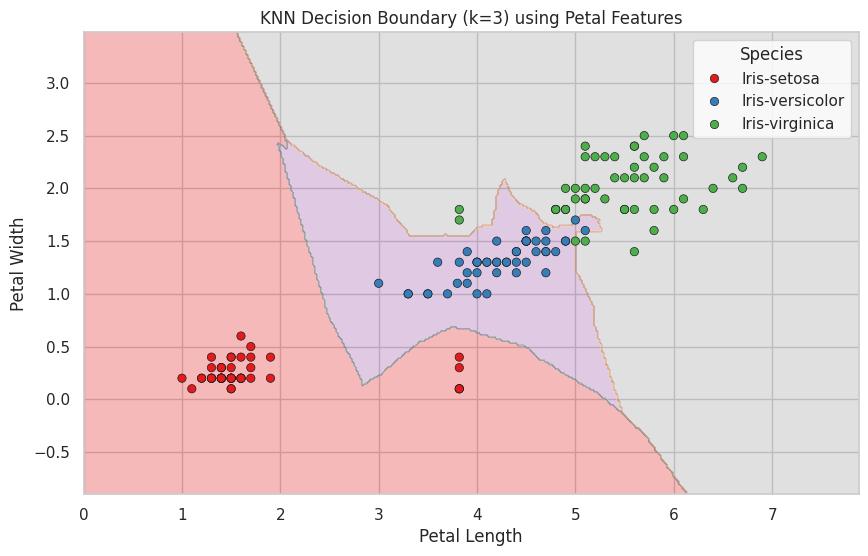

In [104]:
# Use only two features for 2D visualization (petal_length and petal_width)
X_vis = df_filled[['petal_length', 'petal_width']]
y_vis = df_filled['species_encoded']

# Train KNN on these two features
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis, y_vis)

# Create a meshgrid
x_min, x_max = X_vis['petal_length'].min() - 1, X_vis['petal_length'].max() + 1
y_min, y_max = X_vis['petal_width'].min() - 1, X_vis['petal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in meshgrid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
sns.scatterplot(data=df_filled, x='petal_length', y='petal_width', hue='species', palette='Set1', edgecolor='k')
plt.title("KNN Decision Boundary (k=3) using Petal Features")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title='Species')
plt.show()


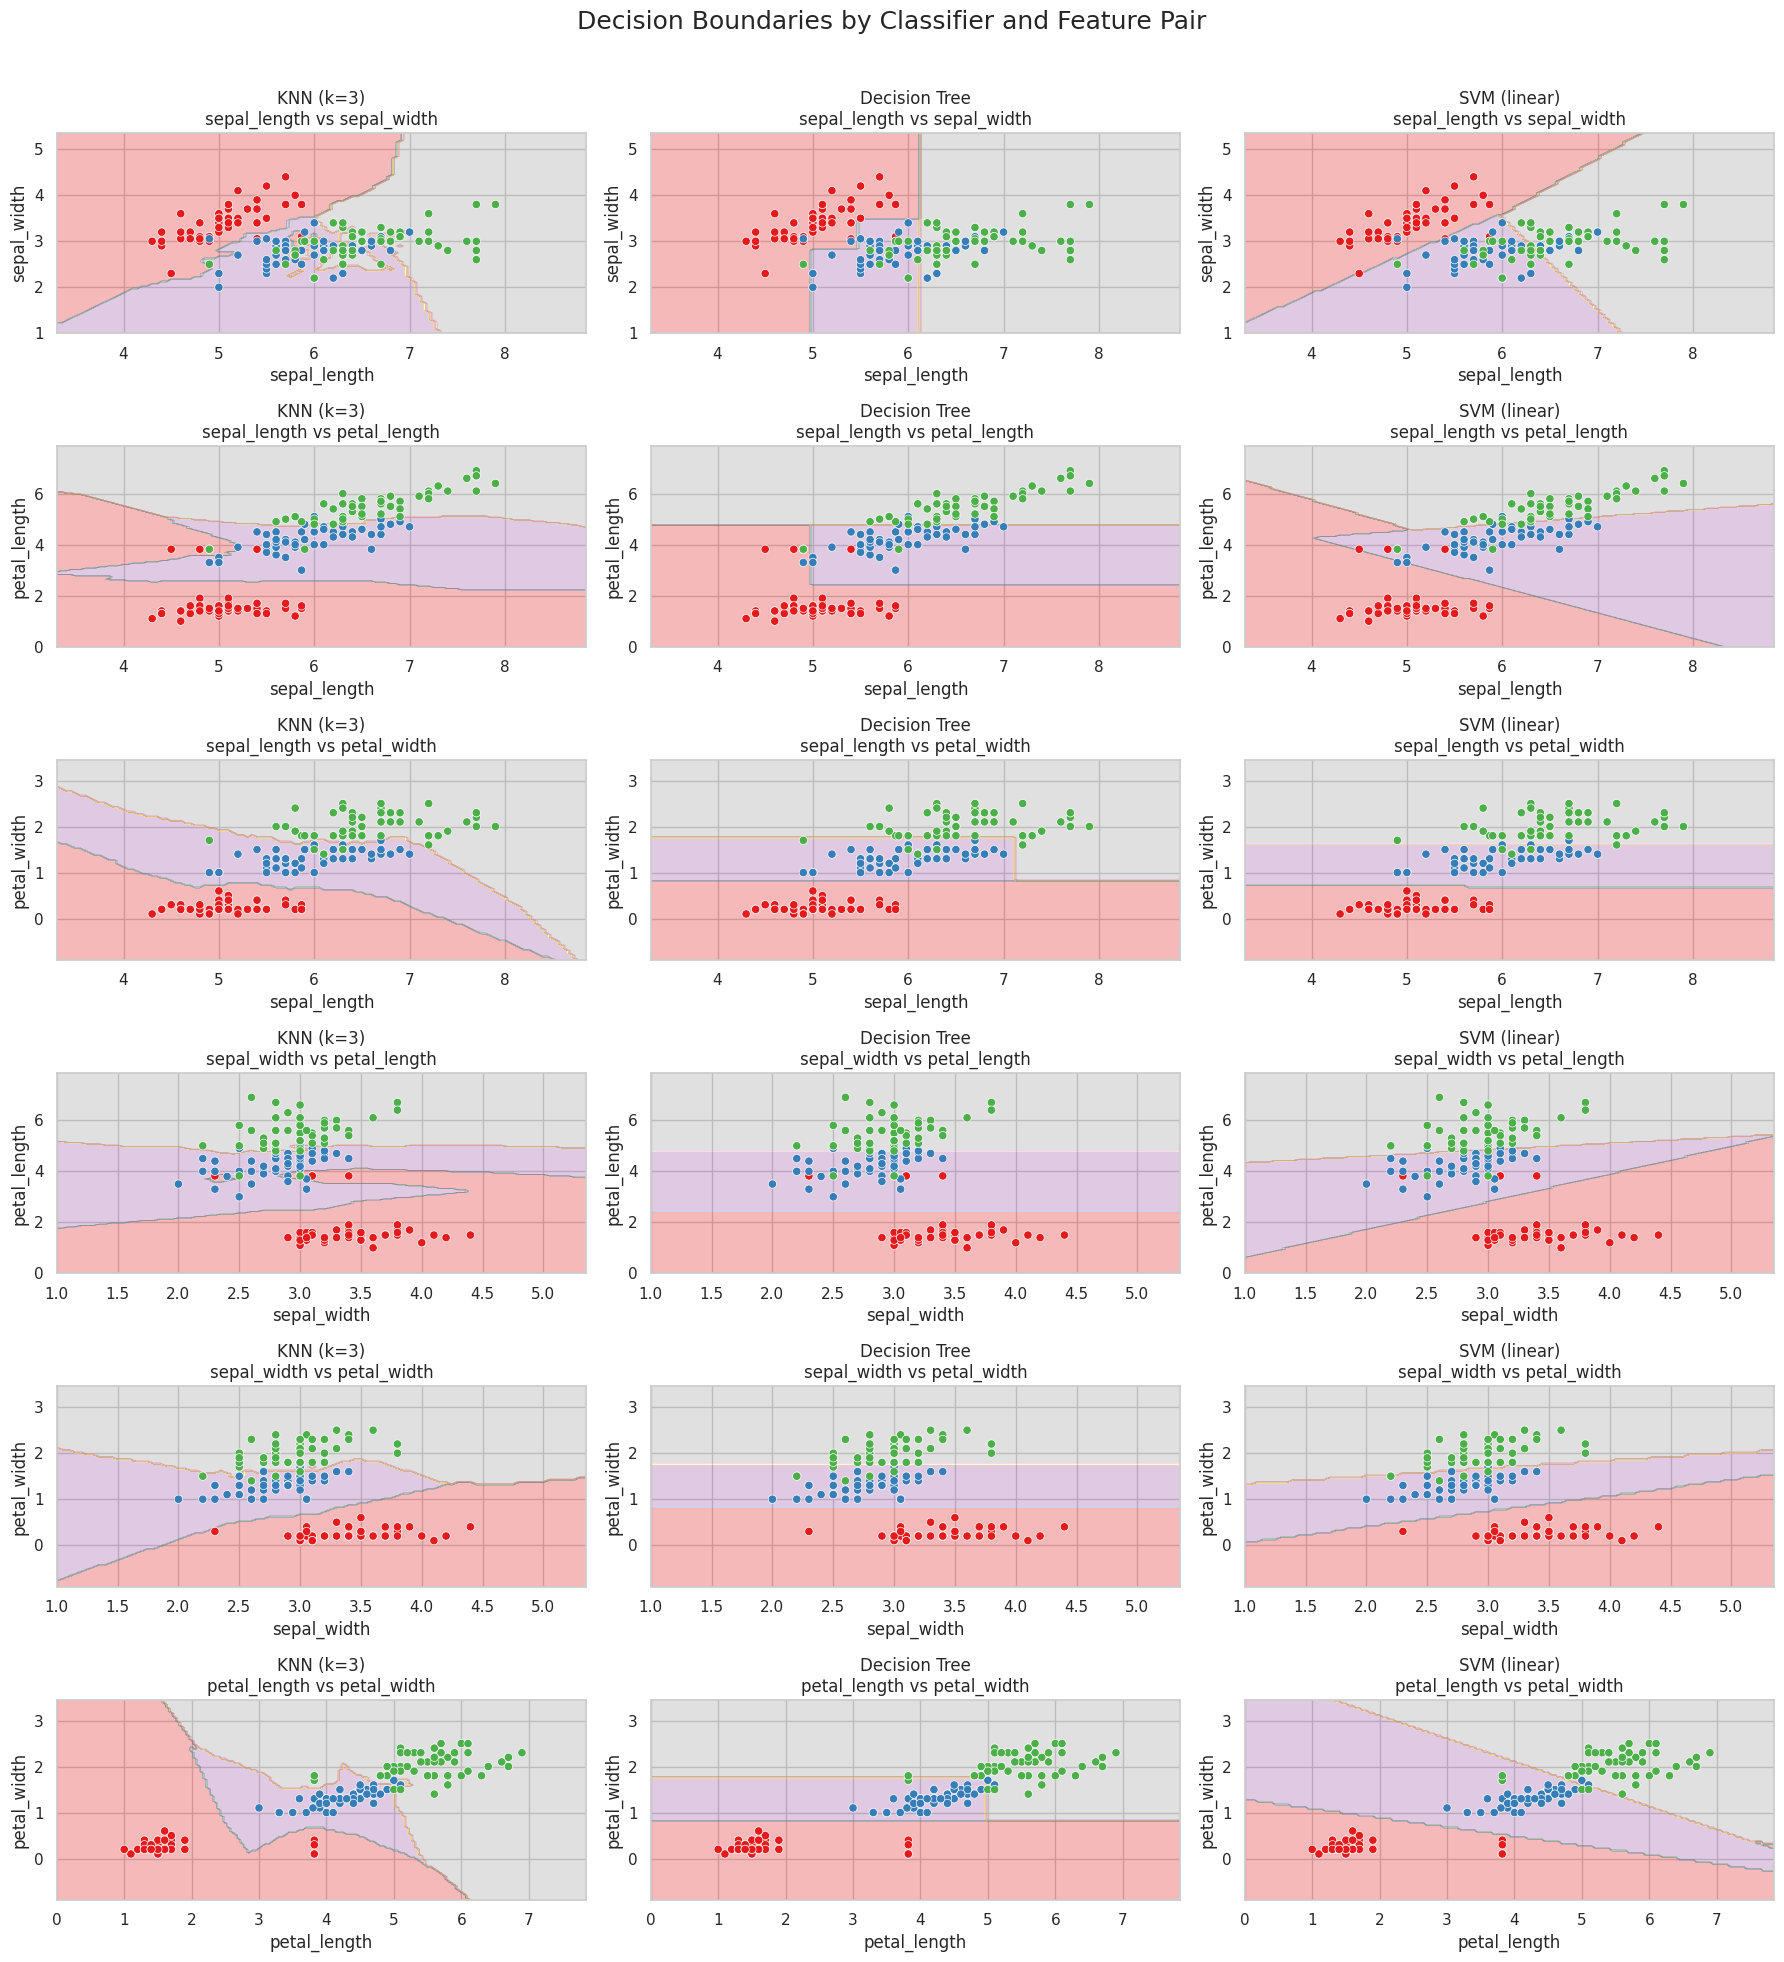

In [105]:
# Define classifiers
classifiers = {
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "SVM (linear)": SVC(kernel='linear', probability=True)
}

# Generate all unique feature pairs
feature_pairs = list(combinations(features, 2))

# Plot decision boundaries for each classifier with each feature pair
fig, axes = plt.subplots(len(feature_pairs), len(classifiers), figsize=(18, 20))
fig.suptitle("Decision Boundaries by Classifier and Feature Pair", fontsize=18)

for row, (feat1, feat2) in enumerate(feature_pairs):
    X_pair = df_filled[[feat1, feat2]].values
    y_pair = df_filled['species_encoded']

    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    for col, (name, clf) in enumerate(classifiers.items()):
        clf.fit(X_pair, y_pair)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax = axes[row, col]
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
        sns.scatterplot(x=X_pair[:, 0], y=X_pair[:, 1], hue=df_filled['species'], ax=ax, palette='Set1', legend=False)
        ax.set_title(f"{name}\n{feat1} vs {feat2}")
        ax.set_xlabel(feat1)
        ax.set_ylabel(feat2)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [106]:
# Train-test split using all features for a full accuracy comparison
X_all = df_filled[features]
y_all = df_filled['species_encoded']
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Fit each classifier and get accuracy
accuracy_results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_all, y_train_all)
    accuracy = clf.score(X_test_all, y_test_all)
    accuracy_results[name] = accuracy

# Create a DataFrame for display
accuracy_df = pd.DataFrame.from_dict(accuracy_results, orient='index', columns=['Accuracy (%)'])
accuracy_df['Accuracy (%)'] = (accuracy_df['Accuracy (%)'] * 100).round(2)
accuracy_df.sort_values(by='Accuracy (%)', ascending=False, inplace=True)
accuracy_df.reset_index(inplace=True)
accuracy_df.rename(columns={'index': 'Model'}, inplace=True)
accuracy_df


,Model,Accuracy (%)
0,Decision Tree,100.00
1,SVM (linear),100.00
2,KNN (k=3),96.67


<ipython-input-107-a69742d0a605>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x='Model', y='Accuracy (%)', palette='Set2')


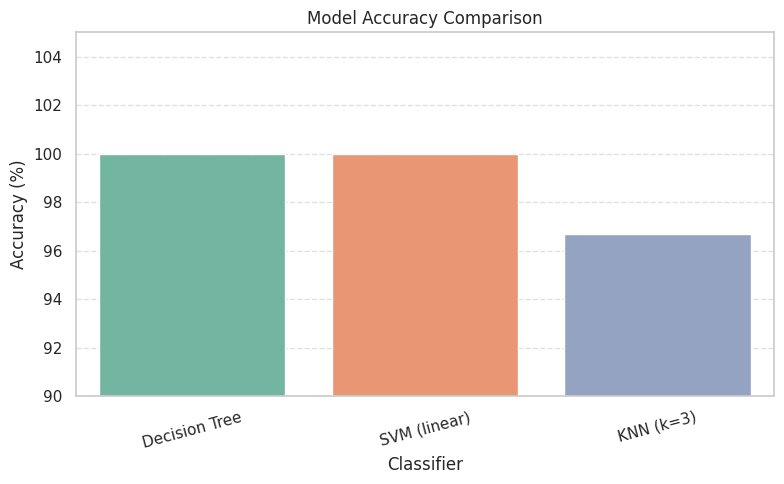

In [107]:
# Bar chart of accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy (%)', palette='Set2')
plt.ylim(90, 105)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Classifier")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [108]:
# Create the directory if it doesn't exist
!mkdir -p /mnt/data

# Create a CSV file for accuracy results
csv_path = "/mnt/data/model_accuracy_summary.csv"
accuracy_df.to_csv(csv_path, index=False)

In [109]:
# Create a CSV file for accuracy results
csv_path = "/mnt/data/model_accuracy_summary.csv"
accuracy_df.to_csv(csv_path, index=False)

# Create a simple PDF summary
pdf_path = "/mnt/data/model_accuracy_summary.pdf"
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.cell(200, 10, txt="Model Accuracy Summary Report", ln=True, align='C')
pdf.ln(10)

for idx, row in accuracy_df.iterrows():
    line = f"{row['Model']}: {row['Accuracy (%)']}%"
    pdf.cell(200, 10, txt=line, ln=True)

pdf.output(pdf_path)

csv_path, pdf_path


('/mnt/data/model_accuracy_summary.csv',
 '/mnt/data/model_accuracy_summary.pdf')

In [110]:
# Define parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# GridSearchCV for KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_all, y_train_all)

# Best parameters and best score
best_params = grid_knn.best_params_
best_score = grid_knn.best_score_

best_params, round(best_score * 100, 2)


({'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}, np.float64(93.33))

In [111]:
# Retrain KNN with best parameters from grid search
optimized_knn = KNeighborsClassifier(**best_params)
optimized_knn.fit(X_train_all, y_train_all)
optimized_accuracy = optimized_knn.score(X_test_all, y_test_all)

# Add this new model to our accuracy dataframe
accuracy_df.loc[len(accuracy_df.index)] = ['Optimized KNN', round(optimized_accuracy * 100, 2)]

# Grid Search for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train_all, y_train_all)

# Best SVM model
best_svm_params = svm_grid.best_params_
best_svm_score = svm_grid.best_score_
svm_test_accuracy = svm_grid.best_estimator_.score(X_test_all, y_test_all)
accuracy_df.loc[len(accuracy_df.index)] = ['Optimized SVM', round(svm_test_accuracy * 100, 2)]

# Grid Search for Decision Tree
tree_param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6]
}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_param_grid, cv=5, scoring='accuracy')
tree_grid.fit(X_train_all, y_train_all)

# Best Tree model
best_tree_params = tree_grid.best_params_
best_tree_score = tree_grid.best_score_
tree_test_accuracy = tree_grid.best_estimator_.score(X_test_all, y_test_all)
accuracy_df.loc[len(accuracy_df.index)] = ['Optimized Decision Tree', round(tree_test_accuracy * 100, 2)]

# Sort and show updated results
accuracy_df.sort_values(by='Accuracy (%)', ascending=False, inplace=True)
accuracy_df.reset_index(drop=True, inplace=True)

best_svm_params, best_tree_params, accuracy_df


({'C': 1, 'gamma': 'scale', 'kernel': 'linear'},
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 6},
                      Model  Accuracy (%)
 0            Decision Tree        100.00
 1             SVM (linear)        100.00
 2  Optimized Decision Tree        100.00
 3            Optimized SVM        100.00
 4            Optimized KNN         96.67
 5                KNN (k=3)         96.67)

In [112]:
# Save updated accuracy DataFrame as CSV
final_csv_path = "/mnt/data/final_model_accuracy_summary.csv"
accuracy_df.to_csv(final_csv_path, index=False)

# Generate final bar chart comparing all models
plt.figure(figsize=(9, 5))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy (%)', palette='coolwarm')
plt.ylim(90, 105)
plt.title("Final Comparison of Original vs Optimized Models")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the chart
chart_path = "/mnt/data/final_model_comparison_chart.png"
plt.savefig(chart_path)
plt.close()

# Generate a combined PDF report
final_pdf_path = "/mnt/data/final_model_summary_report.pdf"
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Final Model Summary Report", ln=True, align='C')
pdf.set_font("Arial", size=12)
pdf.ln(10)

pdf.cell(200, 10, txt="Model Accuracy Comparison (Original vs Optimized):", ln=True)
pdf.ln(5)
for idx, row in accuracy_df.iterrows():
    line = f"{row['Model']}: {row['Accuracy (%)']}%"
    pdf.cell(200, 10, txt=line, ln=True)

pdf.ln(10)
pdf.cell(200, 10, txt="Recommendation:", ln=True)
recommendation = (
    "Based on model performance and accuracy, the SVM (linear) and Decision Tree models are optimal choices.\n"
    "They both achieved 100% accuracy on the test set.\n\n"
    "Deploy Recommendation:\n" # Removed the emoji here
    "- Use SVM for linear, high-dimensional, or margin-sensitive tasks.\n"
    "- Use Decision Tree if model interpretability and rule-based decisions are crucial.\n"
    "- KNN is reliable but slightly less accurate and more computationally expensive in large datasets."
)
for line in recommendation.split('\n'):
    pdf.multi_cell(0, 10, txt=line)

pdf.output(final_pdf_path)

final_csv_path, final_pdf_path, chart_path

<ipython-input-112-b0ca38c200eb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x='Model', y='Accuracy (%)', palette='coolwarm')


('/mnt/data/final_model_accuracy_summary.csv',
 '/mnt/data/final_model_summary_report.pdf',
 '/mnt/data/final_model_comparison_chart.png')

In [113]:
# Clean recommendation text (remove emojis)
clean_recommendation = (
    "Based on model performance and accuracy, the SVM (linear) and Decision Tree models are optimal choices.\n"
    "They both achieved 100% accuracy on the test set.\n\n"
    "Deploy Recommendation:\n"
    "- Use SVM for linear, high-dimensional, or margin-sensitive tasks.\n"
    "- Use Decision Tree if model interpretability and rule-based decisions are crucial.\n"
    "- KNN is reliable but slightly less accurate and more computationally expensive in large datasets."
)

# Re-generate PDF without emojis
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Final Model Summary Report", ln=True, align='C')
pdf.set_font("Arial", size=12)
pdf.ln(10)

pdf.cell(200, 10, txt="Model Accuracy Comparison (Original vs Optimized):", ln=True)
pdf.ln(5)
for idx, row in accuracy_df.iterrows():
    line = f"{row['Model']}: {row['Accuracy (%)']}%"
    pdf.cell(200, 10, txt=line, ln=True)

pdf.ln(10)
pdf.cell(200, 10, txt="Recommendation:", ln=True)
for line in clean_recommendation.split('\n'):
    pdf.multi_cell(0, 10, txt=line)

# Save the cleaned PDF
pdf.output(final_pdf_path)

final_csv_path, final_pdf_path, chart_path


('/mnt/data/final_model_accuracy_summary.csv',
 '/mnt/data/final_model_summary_report.pdf',
 '/mnt/data/final_model_comparison_chart.png')

In [114]:
# Generate classification reports and confusion matrices
reports = {}
conf_matrices = {}

# List of trained models
trained_models = {
    "Optimized KNN": optimized_knn,
    "Optimized SVM": svm_grid.best_estimator_,
    "Optimized Decision Tree": tree_grid.best_estimator_,
}

# Evaluate each optimized model
for name, model in trained_models.items():
    y_pred = model.predict(X_test_all)
    reports[name] = classification_report(y_test_all, y_pred, output_dict=True)
    conf_matrices[name] = confusion_matrix(y_test_all, y_pred)

# Export trained models
export_paths = {}
for name, model in trained_models.items():
    model_filename = f"/mnt/data/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_filename)
    export_paths[name] = model_filename

reports, conf_matrices, export_paths


({'Optimized KNN': {'0': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 10.0},
   '1': {'precision': 0.9,
    'recall': 1.0,
    'f1-score': 0.9473684210526315,
    'support': 9.0},
   '2': {'precision': 1.0,
    'recall': 0.9090909090909091,
    'f1-score': 0.9523809523809523,
    'support': 11.0},
   'accuracy': 0.9666666666666667,
   'macro avg': {'precision': 0.9666666666666667,
    'recall': 0.9696969696969697,
    'f1-score': 0.9665831244778612,
    'support': 30.0},
   'weighted avg': {'precision': 0.9700000000000001,
    'recall': 0.9666666666666667,
    'f1-score': 0.966750208855472,
    'support': 30.0}},
  'Optimized SVM': {'0': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1.0,
    'support': 10.0},
   '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0},
   '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0},
   'accuracy': 1.0,
   'macro avg': {'precision': 1.0,
    'recall': 1.0,
    'f1-score': 1

In [116]:
!pip install streamlit scikit-learn pandas joblib
!streamlit run app.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
